## Aquí tienen un ejemplo mas visual de como se procesan los documentos en local con unstructured 📏

In [1]:
from langchain_unstructured import UnstructuredLoader
from langchain.document_loaders import UnstructuredPDFLoader

file_path='biblia.pdf'

loader =  UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",
    partition_via_api=False,
)
docs = []
for doc in loader.lazy_load():
    docs.append(doc)

c:\Users\Abraham Pérez\OneDrive\Desktop\Trabajo\panomada\repositorio_canal\agent_edu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO: pikepdf C++ to Python logger bridge initialized
INFO: PDF text extraction failed, skip text extraction...
INFO: Reading PDF for file: biblia.pdf ...


In [2]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image


def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()


def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

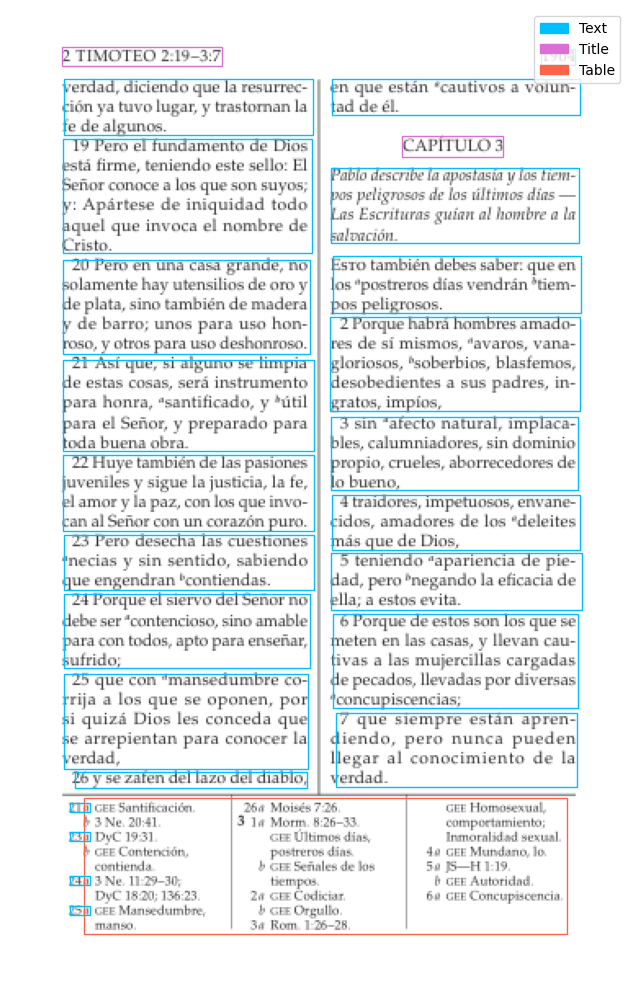

2 TIMOTEO 2:19-3:7

1904

verdad, diciendo que la resurrec- cién ya tuvo lugar, y trastornan la fe de algunos.

en que estan “cautivos a volun- tad de él.

19 Pero el fundamento de Dios esta firme, teniendo este sello: El Sefior conoce a los que son suyos; y: Apartese de iniquidad todo aquel que invoca el nombre de Cristo.

CAPITULO 3

Pablo describe la apostasia y los tiem- pos peligrosos de los uiltimos dias — Las Escrituras guian al hombre a la salvacion.

20 Pero en una casa grande, no solamente hay utensilios de oro y de plata, sino también de madera y de barro; unos para uso hon- roso, y otros para uso deshonroso.

21 Asi que, si alguno se limpia de estas cosas, sera instrumento para honra, “santificado, y util para el Senor, y preparado para toda buena obra.

22 Huye también de las pasiones juveniles y sigue la justicia, la fe, el amor y la paz, con los que invo- can al Sefor con un coraz6n puro.

23 Pero desecha las cuestiones "necias y sin sentido, sabiendo que engendran 'cont

In [3]:
render_page(docs, 1911)